In [90]:
import pandas as pd

In [94]:
wine = pd.read_csv('winequalityN.csv')

In [95]:
wine

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Segun el dataset de wine, realice las siguientes actividades:
- Limpie las variables numericas. (evalue primero si vale la pena estretificar por type), en caso de existir valores atipicos remplece por la media.
- Aplique PCA utilizando maximo 5 columnas (evalue si el PCA vale la pena hacer uno para white y otro para red)
    - No se debe de usar quality para este ejercicio
- Una ves tenga el PCA, aplique un algoritmo de k-means para crear tres perfiles del vino. (explique que significa cada perfil)
- Agregue la nueva variable al dateset y elimine las columnas que hayan formado parte de analisis del PCA, tanto para white como para red, en caso que hayan sido entrenamientos distintos.
- Crea la varible de respuesta de la siguiente manera:
    - if quality >= 5 ? 1 else 0
- Elimine la variable quality del dataset
- Aplique los siguientes entrenamientos de MLS (evalue primero si vale la pena estretificar por type):
    - Regresion Logistica
    - NN
    - Aroboles de desiciones
    - Random Forest
- Explique cual de los entrenamientos fue el mejor?

In [93]:
import numpy as np

from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x16028b83e50>,
 'caps': [<matplotlib.lines.Line2D at 0x16028b94430>,
 'boxes': [<matplotlib.lines.Line2D at 0x16028b759d0>],
 'medians': [<matplotlib.lines.Line2D at 0x16028b949d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x16028b94ca0>],
 'means': []}

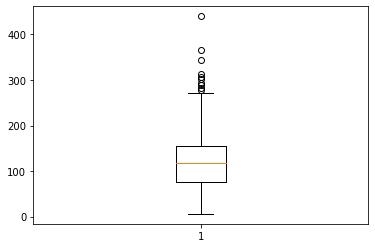

In [97]:
plt.boxplot( wine["total sulfur dioxide"] )

In [98]:
wine.loc[:, ['type']].value_counts()

type 
white    4898
red      1599
dtype: int64

In [99]:
wine.loc[:, ['type']].value_counts()/wine.shape[0]

type 
white    0.753886
red      0.246114
dtype: float64

In [101]:
wn = wine.loc[(wine['type']=='white') , ['total sulfur dioxide']]

{'whiskers': [<matplotlib.lines.Line2D at 0x16028be9b50>,
 'caps': [<matplotlib.lines.Line2D at 0x16028bfa130>,
 'boxes': [<matplotlib.lines.Line2D at 0x16028be9880>],
 'medians': [<matplotlib.lines.Line2D at 0x16028bfa6d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x16028bfa9a0>],
 'means': []}

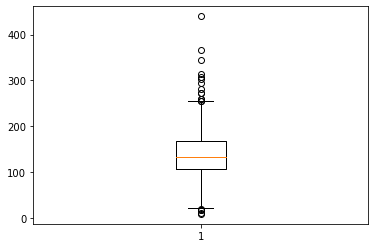

In [102]:
plt.boxplot(wn)

In [103]:
np.mean(wn['total sulfur dioxide'])

138.36065741118824

In [104]:
q1 = np.quantile(wn , 0.25 )
q3 = np.quantile(wn , 0.75 )

In [105]:
q1

108.0

In [106]:
q3

167.0

In [107]:
iqr = q3 - q1

In [108]:
iqr

59.0

In [109]:
upper_bound = q3 + (1.5*iqr)
lower_bound = q1 - (1.5*iqr)

In [110]:
upper_bound

255.5

In [111]:
lower_bound

19.5

In [112]:
wn.loc[(wn['total sulfur dioxide'] > upper_bound) | (wn['total sulfur dioxide'] < lower_bound) , : ]

,total sulfur dioxide
227,272.0
325,313.0
387,260.0
740,19.0
1417,366.5
1931,307.5
1940,256.0
1942,256.0
2127,344.0
2378,282.0


In [113]:
wnq1 = wine.loc[ : , ["type","total sulfur dioxide"] ].groupby( ["type"] , as_index = False ).quantile(0.25)
wnq1.columns = ["type","Total_sulfur_dioxide_q1"]

In [114]:
wnq3 = wine.loc[ : , ["type","total sulfur dioxide"] ].groupby( ["type"] , as_index = False ).quantile(0.75)
wnq3.columns = ["type","Total_sulfur_dioxide_q3"]

In [115]:
wnmean =wine.loc[ : , ["type","total sulfur dioxide"] ].groupby( ["type"] , as_index = False ).mean()
wnmean.columns = ["type","Total_sulfur_mean"]

In [116]:
wnmean

,type,Total_sulfur_mean
0,red,46.467792
1,white,138.360657


In [117]:
wn_iqr = wnq1.merge( wnq3 , on=["type"] , how="inner" ).merge( wnmean , on=["type"] , how="inner" )

In [118]:
wn_iqr

,type,Total_sulfur_dioxide_q1,Total_sulfur_dioxide_q3,Total_sulfur_mean
0,red,22.0,62.0,46.467792
1,white,108.0,167.0,138.360657


In [119]:
wn_iqr["iqr"] = wn_iqr.apply( lambda r: r["Total_sulfur_dioxide_q3"] - r["Total_sulfur_dioxide_q1"] , axis = 1)

In [120]:
wn_iqr["upper"] = wn_iqr.apply( lambda r: ( r["Total_sulfur_dioxide_q3"] + 1.5*r["iqr"] ) , axis = 1)
wn_iqr["lower"] = wn_iqr.apply( lambda r: ( r["Total_sulfur_dioxide_q1"] - 1.5*r["iqr"] ) , axis = 1)

In [121]:
wn_iqr

,type,Total_sulfur_dioxide_q1,Total_sulfur_dioxide_q3,Total_sulfur_mean,iqr,upper,lower
0,red,22.0,62.0,46.467792,40.0,122.0,-38.0
1,white,108.0,167.0,138.360657,59.0,255.5,19.5


In [122]:
wn_t = wine.merge(wn_iqr , on=["type"] , how="left" ).copy()

In [123]:
wn_t

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Total_sulfur_dioxide_q1,Total_sulfur_dioxide_q3,Total_sulfur_mean,iqr,upper,lower
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,108.0,167.0,138.360657,59.0,255.5,19.5
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,108.0,167.0,138.360657,59.0,255.5,19.5
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,108.0,167.0,138.360657,59.0,255.5,19.5
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,108.0,167.0,138.360657,59.0,255.5,19.5
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,108.0,167.0,138.360657,59.0,255.5,19.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,22.0,62.0,46.467792,40.0,122.0,-38.0
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6,22.0,62.0,46.467792,40.0,122.0,-38.0
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,22.0,62.0,46.467792,40.0,122.0,-38.0
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,22.0,62.0,46.467792,40.0,122.0,-38.0


In [124]:
def getRealtotal(r):
    if ( r["total sulfur dioxide"] <= r["lower"] ) | ( r["total sulfur dioxide"] >= r["upper"] ):
        return r["Total_sulfur_mean"]
    else:
        return r["total sulfur dioxide"]

In [125]:
wn_t.apply( lambda r: getRealtotal(r) , axis = 1 )

0       170.0
1       132.0
2        97.0
3       186.0
4       186.0
        ...  
6492     44.0
6493     51.0
6494     40.0
6495     44.0
6496     42.0
Length: 6497, dtype: float64

In [126]:
wn_t["new_total_sulfur_dioxide"] = wn_t.apply( lambda r: getRealtotal(r) , axis = 1 )

In [127]:
wn_t

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Total_sulfur_dioxide_q1,Total_sulfur_dioxide_q3,Total_sulfur_mean,iqr,upper,lower,new_total_sulfur_dioxide
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,108.0,167.0,138.360657,59.0,255.5,19.5,170.0
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,108.0,167.0,138.360657,59.0,255.5,19.5,132.0
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,108.0,167.0,138.360657,59.0,255.5,19.5,97.0
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,108.0,167.0,138.360657,59.0,255.5,19.5,186.0
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,108.0,167.0,138.360657,59.0,255.5,19.5,186.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,22.0,62.0,46.467792,40.0,122.0,-38.0,44.0
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6,22.0,62.0,46.467792,40.0,122.0,-38.0,51.0
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,22.0,62.0,46.467792,40.0,122.0,-38.0,40.0
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,22.0,62.0,46.467792,40.0,122.0,-38.0,44.0


<AxesSubplot:xlabel='type', ylabel='new_total_sulfur_dioxide'>

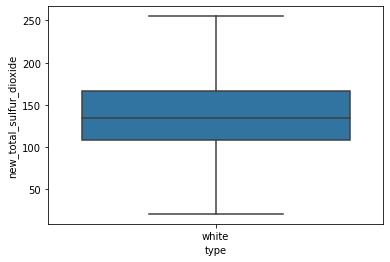

In [128]:
sns.boxplot( data=wn_t.loc[ (wn_t['type'] == 'white')  , : ]  , x="type" , y="new_total_sulfur_dioxide" )

<AxesSubplot:xlabel='type', ylabel='total sulfur dioxide'>

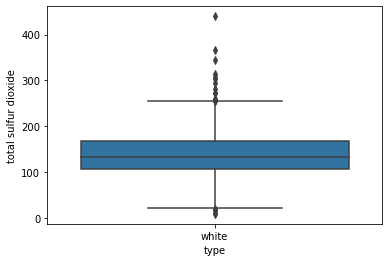

In [88]:
sns.boxplot( data=wine.loc[ (wine['type'] == 'white')  , : ]  , x="type" , y="total sulfur dioxide" )

In [129]:
wn_t.to_csv('winequalityN_limpio', index_label=False)